# Business Analytics Capstone Project
##### Pedro D'Avila


In [1]:
import pandas as pd
import numpy as np



### Loading the data into the notebook


In [2]:
#Load world bank data for GDP:

wb1=pd.read_excel("world_bank.xls")

In [3]:
wb1.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,Last Updated Date,2023-12-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1.960000e+03,1.961000e+03,1.962000e+03,1.963000e+03,1.964000e+03,1.965000e+03,...,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2.017000e+03,2.018000e+03,2.019000e+03,2.020000e+03,2.021000e+03,2.022000e+03
3,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.727850e+09,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09
4,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.847810e+10,1.936631e+10,2.050647e+10,2.224273e+10,2.429433e+10,2.661956e+10,...,9.863429e+11,1.006992e+12,9.325135e+11,8.900514e+11,1.028394e+12,1.012521e+12,1.006191e+12,9.288802e+11,1.086531e+12,1.185138e+12


In [4]:
# Load carbon budget data for emissions:

cb1 = pd.read_csv("carbon_budget_full.csv")

In [5]:
cb1.head()

,Year,Country,Fuels_Coal,Fuels_Oil,Fuels_Gas,Fuels_Cement,Fuels_Flaring,Fuels_Bunkers,Fuels_Total
0,1850,World,53.698681,0.0,0.0,0.0,0.0,0.0,53.698681
1,1851,World,54.221643,0.0,0.0,0.0,0.0,0.0,54.221643
2,1852,World,56.608683,0.0,0.0,0.0,0.0,0.0,56.608683
3,1853,World,59.257762,0.0,0.0,0.0,0.0,0.0,59.257762
4,1854,World,69.605122,0.0,0.0,0.0,0.0,0.0,69.605122


In [6]:
# Load the population data that will be used to calculate GDP per capita
pop = pd.read_excel("world_population.xls")

In [7]:
pop.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,Last Updated Date,2024-03-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN
4,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,NaN


### Data pre-processing:

After the data from the 3 sources got loaded into the notebook, the next step is to clean up the data to make sure they have appropriate data types in each column, non null values, and are formated correctly so we can proceed to merge them.

First we start with the world bank GDP data. After visualizing the first rows of the data we can see that the set is pivoted and the first 2 rows does not contain any data. So we can fix that.

 #### GDP data pre-processing:

In [8]:
# Drop the first 2 rows of dataframe wb1

wb1.drop([0, 1], axis=0, inplace=True)
wb1.head()


,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
2,Country Name,Country Code,Indicator Name,Indicator Code,1.960000e+03,1.961000e+03,1.962000e+03,1.963000e+03,1.964000e+03,1.965000e+03,...,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2.017000e+03,2.018000e+03,2.019000e+03,2.020000e+03,2.021000e+03,2.022000e+03
3,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.727850e+09,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09
4,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.847810e+10,1.936631e+10,2.050647e+10,2.224273e+10,2.429433e+10,2.661956e+10,...,9.863429e+11,1.006992e+12,9.325135e+11,8.900514e+11,1.028394e+12,1.012521e+12,1.006191e+12,9.288802e+11,1.086531e+12,1.185138e+12
5,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.014642e+10,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,NaN
6,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.041165e+10,1.113592e+10,1.195171e+10,1.268581e+10,1.384900e+10,1.487476e+10,...,8.340970e+11,8.945050e+11,7.692632e+11,6.921149e+11,6.856303e+11,7.681582e+11,8.234056e+11,7.869624e+11,8.449275e+11,8.753937e+11


In [9]:
# Make the first row of wb1 dataframe the headers

wb1.columns = wb1.iloc[0]
wb2 = wb1.iloc[1:]


In [10]:
wb2.head()

2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
3,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.727850e+09,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09
4,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.847810e+10,1.936631e+10,2.050647e+10,2.224273e+10,2.429433e+10,2.661956e+10,...,9.863429e+11,1.006992e+12,9.325135e+11,8.900514e+11,1.028394e+12,1.012521e+12,1.006191e+12,9.288802e+11,1.086531e+12,1.185138e+12
5,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.014642e+10,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,NaN
6,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.041165e+10,1.113592e+10,1.195171e+10,1.268581e+10,1.384900e+10,1.487476e+10,...,8.340970e+11,8.945050e+11,7.692632e+11,6.921149e+11,6.856303e+11,7.681582e+11,8.234056e+11,7.869624e+11,8.449275e+11,8.753937e+11
7,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.323391e+11,1.359668e+11,9.049642e+10,5.276162e+10,7.369016e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.067828e+11


In [11]:
# Drop the columns in wb1 from 1960.0 to 1983 (not needed for the analysis)

wb3=wb2.drop(columns=wb2.columns[4:27], axis=1)
wb3.head()


2,Country Name,Country Code,Indicator Name,Indicator Code,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
3,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,4.055866e+08,4.877095e+08,5.966480e+08,...,2.727850e+09,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09
4,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.751087e+11,1.627521e+11,1.357955e+11,1.533687e+11,1.865947e+11,2.056359e+11,...,9.863429e+11,1.006992e+12,9.325135e+11,8.900514e+11,1.028394e+12,1.012521e+12,1.006191e+12,9.288802e+11,1.086531e+12,1.185138e+12
5,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.014642e+10,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,NaN
6,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.381169e+11,1.142639e+11,1.165085e+11,1.075070e+11,1.102817e+11,1.089447e+11,...,8.340970e+11,8.945050e+11,7.692632e+11,6.921149e+11,6.856303e+11,7.681582e+11,8.234056e+11,7.869624e+11,8.449275e+11,8.753937e+11
7,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,5.787824e+09,6.135166e+09,7.558613e+09,7.076794e+09,8.089279e+09,8.775116e+09,...,1.323391e+11,1.359668e+11,9.049642e+10,5.276162e+10,7.369016e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.067828e+11


In [12]:
# Let's check the type of the GDP value in the dataset:
first_row = wb3.iloc[0]
fifth_element = first_row[4]
print(type(fifth_element))


<class 'numpy.float64'>


In [13]:
# Unpivot the the GDP data while keeping 'Year' and 'Country' as identifiers using pandas melt method

wb3_melted = wb3.melt(id_vars=['Country Name', 'Country Code'], var_name="Year", value_name="GDP")
wb3_melted.head()


,Country Name,Country Code,Year,GDP
0,Aruba,ABW,Indicator Name,GDP (current US$)
1,Africa Eastern and Southern,AFE,Indicator Name,GDP (current US$)
2,Afghanistan,AFG,Indicator Name,GDP (current US$)
3,Africa Western and Central,AFW,Indicator Name,GDP (current US$)
4,Angola,AGO,Indicator Name,GDP (current US$)


In [14]:
# Drop the rows from  wb3_melted where the value is "GDP (current US$)" or "NY.GDP.MKTP.CD" to clean up the repeated values
# after unpivoting the data

wb3_melted = wb3_melted[~wb3_melted['GDP'].isin(["GDP (current US$)", "NY.GDP.MKTP.CD"])]
wb3_melted.tail(500)

,Country Name,Country Code,Year,GDP
10672,Bhutan,BTN,2021.0,2768003872.540653
10673,Botswana,BWA,2021.0,18737066311.159695
10674,Central African Republic,CAF,2021.0,2516498412.463837
10675,Canada,CAN,2021.0,2001486745423.92334
10676,Central Europe and the Baltics,CEB,2021.0,1908002281033.507568
...,...,...,...,...
11167,Kosovo,XKX,2022.0,9409473517.953037
11168,"Yemen, Rep.",YEM,2022.0,NaN
11169,South Africa,ZAF,2022.0,405270850099.387085
11170,Zambia,ZMB,2022.0,29163782138.341488


In [15]:
# To make sure we have all the years of data we need for the analysis let's list the distinct values from year in wb3_melted:

distinct_years = wb3_melted['Year'].unique()
print(distinct_years)

[1983.0 1984.0 1985.0 1986.0 1987.0 1988.0 1989.0 1990.0 1991.0 1992.0
 1993.0 1994.0 1995.0 1996.0 1997.0 1998.0 1999.0 2000.0 2001.0 2002.0
 2003.0 2004.0 2005.0 2006.0 2007.0 2008.0 2009.0 2010.0 2011.0 2012.0
 2013.0 2014.0 2015.0 2016.0 2017.0 2018.0 2019.0 2020.0 2021.0 2022.0]


#### Carbon emissions data pre-processing:



In [16]:
# To match the dates range in the GDP data we will keep only records between 1983 and 2022

cb2 = cb1.loc[(cb1['Year'] >= 1983) & (cb1['Year'] <= 2022)]
cb2.head()

,Year,Country,Fuels_Coal,Fuels_Oil,Fuels_Gas,Fuels_Cement,Fuels_Flaring,Fuels_Bunkers,Fuels_Total
133,1983,World,1991.703818,2253.435369,753.543726,111.793372,58.091596,97.720898,5266.288780
134,1984,World,2088.059419,2271.769221,821.771901,113.907113,50.969548,98.075099,5444.552301
135,1985,World,2238.520211,2271.307109,852.060463,115.298294,49.521952,100.169978,5626.878007
136,1986,World,2270.915116,2339.337374,831.372713,120.108934,46.307296,107.332204,5715.373636
137,1987,World,2346.742781,2358.918491,902.816548,125.246974,44.489434,143.840778,5922.055007


In [17]:
# In order to merge GDP and Emissions data sets, let's ensure the Year values are all the same data type (integer)

wb3_melted['Year'] = wb3_melted['Year'].astype('int64')
cb2['Year'] = cb2['Year'].astype('int64')


<ipython-input-17-96825a1ddbfb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cb2['Year'] = cb2['Year'].astype('int64')


In [18]:
# Let's check the number or records available in both our processed GDP data and the Carbon budget data

print(len(wb3_melted))
print(len(cb2))


10640
8304


We observe there are more records on the GDP data than there are on the Carbon budget data. When merging this is important to know and decide what type of merge will be used. If we use inner merge, we will be dropping rows from the GDP data most likely.

In [19]:
distinct_years2 = cb2['Year'].unique()
print(distinct_years2)

[1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]


#### World population data pre-processing:

This data set is similar to the GDP data set since they came from the same source. I will be using similar steps to unpivot and pre-process the data

In [20]:
#Remove first 2 rows with no data
pop.drop([0, 1], axis=0, inplace=True)
pop.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN
4,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,NaN
5,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN
6,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN


In [21]:
#Correct the headers
pop.columns = pop.iloc[0]
pop2 = pop.iloc[1:]
pop2.head()

2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN
4,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,NaN
5,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN
6,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN
7,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN


In [22]:
# Correct the time frame to match the other 2 sets
pop3=pop2.drop(columns=pop2.columns[4:27], axis=1)
pop3.head()

2,Country Name,Country Code,Indicator Name,Indicator Code,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
3,Aruba,ABW,"Population, total",SP.POP.TOTL,63683.0,64174.0,64478.0,64553.0,64450.0,64332.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN
4,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,252779730.0,260209149.0,267938123.0,276035920.0,284490394.0,292795186.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,NaN
5,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9951449.0,10243686.0,10512221.0,10448442.0,10322758.0,10383460.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN
6,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,171566640.0,176054495.0,180817312.0,185720244.0,190759952.0,195969722.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN
7,Angola,AGO,"Population, total",SP.POP.TOTL,9276707.0,9617702.0,9970621.0,10332574.0,10694057.0,11060261.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN


In [23]:
# Unpivot the Population while keeping 'Year' and 'Country' as identifiers
pop3_melted = pop3.melt(id_vars=['Country Name', 'Country Code'], var_name="Year", value_name="Population")
pop3_melted.head()

,Country Name,Country Code,Year,Population
0,Aruba,ABW,Indicator Name,"Population, total"
1,Africa Eastern and Southern,AFE,Indicator Name,"Population, total"
2,Afghanistan,AFG,Indicator Name,"Population, total"
3,Africa Western and Central,AFW,Indicator Name,"Population, total"
4,Angola,AGO,Indicator Name,"Population, total"


In [24]:
# Drop the rows from the Population data where there are repeated values after unpivoting the data

pop3_melted = pop3_melted[~pop3_melted['Population'].isin(["Population, total", "SP.POP.TOTL"])]

In [25]:
pop3_melted.head()

,Country Name,Country Code,Year,Population
532,Aruba,ABW,1983.0,63683.0
533,Africa Eastern and Southern,AFE,1983.0,252779730.0
534,Afghanistan,AFG,1983.0,9951449.0
535,Africa Western and Central,AFW,1983.0,171566640.0
536,Angola,AGO,1983.0,9276707.0


In [26]:
#Cast the Year values to integer so it can be merged to the other 2 data sets
pop3_melted['Year'] = pop3_melted['Year'].astype('int64')

In [27]:
#Let's check the length of the data set to get some insight on how and when to merge it to the other 2 sets
print(len(pop3_melted))

10906


#### Data Visualization:

Now that all data was loaded and pre-processed, let's create some visualizations to understand the data we are dealing with

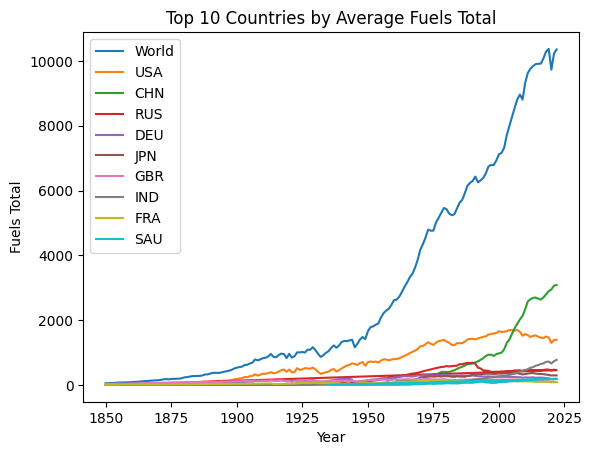

In [28]:
# Let's visualize the trend for emissions for the top 10 most emitting countries:

world_cb1 = cb1[cb1['Country'] == 'World']
top_10_countries = cb1.groupby('Country')['Fuels_Total'].mean().sort_values(ascending=False).head(10).index.tolist()
cb1_top_10 = cb1[cb1['Country'].isin(top_10_countries)]

import matplotlib.pyplot as plt

for country in top_10_countries:
  country_data = cb1_top_10[cb1_top_10['Country'] == country]
  plt.plot(country_data['Year'], country_data['Fuels_Total'], label=country)

plt.xlabel('Year')
plt.ylabel('Fuels Total')
plt.title('Top 10 Countries by Average Fuels Total')
plt.legend()
plt.show()

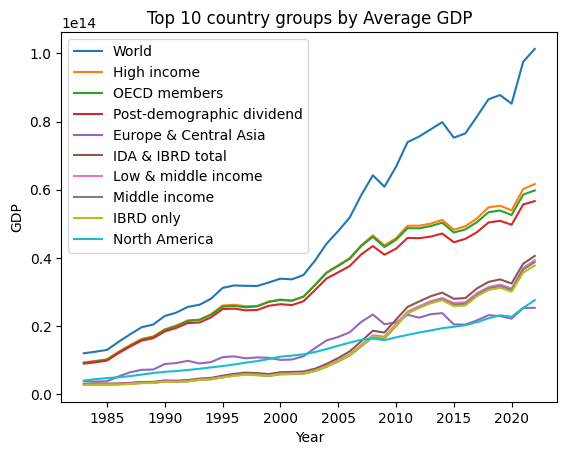

In [29]:
# From the wb3_melted dataframe, select the top 10 countries based on average GDP and show them in a time series

import matplotlib.pyplot as plt
# Calculate the average GDP for each country
avg_gdp = wb3_melted.groupby('Country Name')['GDP'].mean().sort_values(ascending=False)

# Select the top 10 countries by average GDP
top_10_countries = avg_gdp.head(10).index.tolist()

# Filter the wb3_melted dataframe to only include the top 10 countries
wb3_top_10 = wb3_melted[wb3_melted['Country Name'].isin(top_10_countries)]

# Create a time series plot of GDP for the top 10 countries
for country in top_10_countries:
  country_data = wb3_top_10[wb3_top_10['Country Name'] == country]
  plt.plot(country_data['Year'], country_data['GDP'], label=country)

plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Top 10 country groups by Average GDP')
plt.legend()
plt.show()


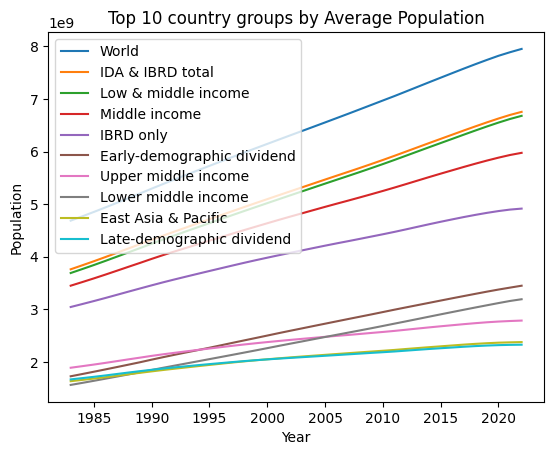

In [30]:
# prompt: From the pop3_melted dataframe, select the top 10 countries based on average population and show them in a time series

import matplotlib.pyplot as plt
# Calculate the average population for each country
avg_population = pop3_melted.groupby('Country Name')['Population'].mean().sort_values(ascending=False)

# Select the top 10 countries by average population
top_10_countries = avg_population.head(10).index.tolist()

# Filter the pop3_melted dataframe to only include the top 10 countries
pop3_top_10 = pop3_melted[pop3_melted['Country Name'].isin(top_10_countries)]

# Create a time series plot of population for the top 10 countries
for country in top_10_countries:
  country_data = pop3_top_10[pop3_top_10['Country Name'] == country]
  plt.plot(country_data['Year'], country_data['Population'], label=country)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Top 10 country groups by Average Population')
plt.legend()
plt.show()


#### Merging the data:

After pre-processing and visualizing the data we noticed that the GDP and the Population data have more records because of pre-existing groups of countries that were given by the World Bank such as "High Income" and "Low Income" countries. Those will be dropped when merging since there are no corresponding carbon emissions for those groups in the carbon budget data set.

In [31]:
# First we merge the GDP and the Population data since they have the most similarities and not much data will be dropped

gdp_pop_merge1 = pd.merge(wb3_melted, pop3_melted, on=['Year', 'Country Code'], how='inner')


In [32]:
gdp_pop_merge1.head()

,Country Name_x,Country Code,Year,GDP,Country Name_y,Population
0,Aruba,ABW,1983,NaN,Aruba,63683.0
1,Africa Eastern and Southern,AFE,1983,175108664048.273407,Africa Eastern and Southern,252779730.0
2,Afghanistan,AFG,1983,NaN,Afghanistan,9951449.0
3,Africa Western and Central,AFW,1983,138116898441.304962,Africa Western and Central,171566640.0
4,Angola,AGO,1983,5787823808.695652,Angola,9276707.0


In [33]:
# Drop Country Name_y and rename Country Name_x to Country Name in gdp_pop_merge1

gdp_pop_merge1.drop(columns=['Country Name_y'], axis=1, inplace=True)
gdp_pop_merge1.rename(columns={'Country Name_x': 'Country Name'}, inplace=True)


In [34]:
gdp_pop_merge1.head()

,Country Name,Country Code,Year,GDP,Population
0,Aruba,ABW,1983,NaN,63683.0
1,Africa Eastern and Southern,AFE,1983,175108664048.273407,252779730.0
2,Afghanistan,AFG,1983,NaN,9951449.0
3,Africa Western and Central,AFW,1983,138116898441.304962,171566640.0
4,Angola,AGO,1983,5787823808.695652,9276707.0


In [35]:
len(gdp_pop_merge1)

10640

In [36]:
# Merge gdp_pop_merge1 with cb2 whre year is the same and gdp_pop_merge1 Country Code is the same as cb2 country make that into gdp_pop_emission1

gdp_pop_emission1 = pd.merge(gdp_pop_merge1, cb2, how='inner', left_on=['Country Code', 'Year'], right_on=['Country', 'Year'])


In [37]:
gdp_pop_emission1.head()

,Country Name,Country Code,Year,GDP,Population,Country,Fuels_Coal,Fuels_Oil,Fuels_Gas,Fuels_Cement,Fuels_Flaring,Fuels_Bunkers,Fuels_Total
0,Aruba,ABW,1983,NaN,63683.0,ABW,0.000,0.087452,0.000,0.000000,0.000,0.000,0.087452
1,Afghanistan,AFG,1983,NaN,9951449.0,AFG,0.105,0.333000,0.168,0.001760,0.080,0.010,0.697760
2,Angola,AGO,1983,5787823808.695652,9276707.0,AGO,0.000,0.692000,0.054,0.027067,0.619,0.380,1.772067
3,Albania,ALB,1983,NaN,2843960.0,ALB,0.847,0.854000,0.266,0.115644,0.000,0.000,2.082644
4,United Arab Emirates,ARE,1983,42803323345.137566,1237572.0,ARE,0.000,3.843000,2.915,0.255569,2.599,0.528,10.140569


In [66]:
gdp_pop_emission1.to_csv("gdp_pop_emission1.csv")

#### Preparing merged data for statistical analysis

Next steps are to drop any null values and calculate columns for GDP per capita, and the percentage change in GDP and percentage change in total emissions.

In [38]:
# Drop rows with NaN values in GDP or Fuels_Total

gdp_pop_emission1.dropna(subset=['GDP', 'Fuels_Total'], inplace=True)


In [39]:
# Count the number of NaN values in both the GDP and the fuels total column to ensure there are none left.

print(gdp_pop_emission1['GDP'].isna().sum())
print(gdp_pop_emission1['Fuels_Total'].isna().sum())


0
0


In [40]:
# Now we calculate the lenght of the merged dataset to confirm the data loss wasn't signinificant
print(len(gdp_pop_emission1))

7323


In [41]:
# Let's confirm the datatype of the main metrics we have in the data set to ensure they are the same type
print(gdp_pop_emission1['Fuels_Total'].dtype)
print(gdp_pop_emission1['GDP'].dtype)
print(gdp_pop_emission1['Population'].dtype)

float64
object
object


In [42]:
# Convert the values on GDP and Population column to float so we can run statistical calculations on them

gdp_pop_emission1['GDP'] = gdp_pop_emission1['GDP'].astype(float)
gdp_pop_emission1['Population'] = gdp_pop_emission1['Population'].astype(float)


In [43]:
print(gdp_pop_emission1['GDP'].dtype)
print(gdp_pop_emission1['Population'].dtype)

float64
float64


In [55]:
# Calculate a column for GDP per Capita which should be GDP divided by Population

gdp_pop_emission1['GDP_per_capita'] = gdp_pop_emission1['GDP'] / gdp_pop_emission1['Population']
gdp_pop_emission1.head()


,Country Name,Country Code,Year,GDP,Population,Country,Fuels_Coal,Fuels_Oil,Fuels_Gas,Fuels_Cement,Fuels_Flaring,Fuels_Bunkers,Fuels_Total,GDP_per_capita
2,Angola,AGO,1983,5.787824e+09,9276707.0,AGO,0.000000,0.692,0.054,0.027067,0.619,0.380,1.772067,623.909304
4,United Arab Emirates,ARE,1983,4.280332e+10,1237572.0,ARE,0.000000,3.843,2.915,0.255569,2.599,0.528,10.140569,34586.531810
5,Argentina,ARG,1983,1.094900e+11,29377137.0,ARG,0.598000,18.743,7.168,0.768971,1.418,0.613,29.308971,3727.048010
7,Antigua and Barbuda,ATG,1983,1.821441e+08,65408.0,ATG,0.000000,0.023,0.000,0.000000,0.000,0.013,0.036000,2784.737233
8,Australia,AUS,1983,1.772654e+11,15393472.0,AUS,28.697965,20.985,6.220,0.648809,0.120,1.382,58.053774,11515.622919


In [56]:
gdp_pop_emission1_sorted_desc = gdp_pop_emission1.sort_values(by='Year', ascending=False)

In [57]:
# On gdp_pop_emission1_sorted_desc add a column for pct_change_gdp where for the same country, add the percentage change between the a given year and the year before

gdp_pop_emission1_sorted_desc['pct_change_gdp'] = (gdp_pop_emission1_sorted_desc['GDP'] - gdp_pop_emission1_sorted_desc.groupby('Country Name')['GDP'].shift(1)) / gdp_pop_emission1_sorted_desc.groupby('Country Name')['GDP'].shift(1)


In [58]:
# On gdp_pop_emission1_sorted_desc add a column for pct_change_total_emission where for the same country, add the percentage change between the a given year and the year before

gdp_pop_emission1_sorted_desc['pct_change_total_emission'] = (gdp_pop_emission1_sorted_desc['Fuels_Total'] - gdp_pop_emission1_sorted_desc.groupby('Country Name')['Fuels_Total'].shift(1)) / gdp_pop_emission1_sorted_desc.groupby('Country Name')['Fuels_Total'].shift(1)


In [59]:
# Count nan from pct_change_gdp on gdp_pop_emission1_sorted_desc. There should be NaN values for the first year data
# of each country since there is no way to calculate percentage change for those

print(gdp_pop_emission1_sorted_desc['pct_change_gdp'].isna().sum())

print(gdp_pop_emission1_sorted_desc['pct_change_total_emission'].isna().sum())

199
199


In [60]:
gdp_pop_emission1_sorted_desc.head(300)

,Country Name,Country Code,Year,GDP,Population,Country,Fuels_Coal,Fuels_Oil,Fuels_Gas,Fuels_Cement,Fuels_Flaring,Fuels_Bunkers,Fuels_Total,GDP_per_capita,pct_change_gdp,pct_change_total_emission
7957,Zimbabwe,ZWE,2022,2.736663e+10,16320537.0,ZWE,1.372000,0.908898,0.000000,0.144887,0.000000,0.017531,2.443316,1676.821489,NaN,NaN
7818,France,FRA,2022,2.779092e+12,67971311.0,FRA,7.631155,48.947712,21.267376,1.772541,0.468435,3.603165,83.690384,40886.253268,NaN,NaN
7827,Equatorial Guinea,GNQ,2022,1.202963e+10,1674908.0,GNQ,0.000000,0.256089,1.019000,0.000000,0.112805,0.031557,1.419451,7182.265382,NaN,NaN
7826,Guinea-Bissau,GNB,2022,1.633559e+09,2105566.0,GNB,0.000000,0.090045,0.000000,0.000000,0.000000,0.012856,0.102901,775.828966,NaN,NaN
7825,"Gambia, The",GMB,2022,2.187195e+09,2705992.0,GMB,0.000000,0.212328,0.000000,0.000000,0.000000,0.017531,0.229859,808.278281,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7721,Sao Tome and Principe,STP,2021,5.244025e+08,223107.0,STP,0.000000,0.040146,0.000000,0.000000,0.000000,0.003034,0.043180,2350.452701,-0.033693,0.080752
7719,Serbia,SRB,2021,6.310107e+10,6834326.0,SRB,8.038373,2.302607,1.367300,0.295750,0.000713,0.080908,12.085651,9232.961606,-0.007274,0.007967
7718,Somalia,SOM,2021,9.838712e+09,17065581.0,SOM,0.000000,0.179266,0.000000,0.000000,0.000000,0.048545,0.227811,576.523678,-0.055744,-0.028028
7717,El Salvador,SLV,2021,2.945124e+10,6314167.0,SLV,0.000000,1.948731,0.000000,0.113215,0.000000,0.058658,2.120605,4664.311223,-0.093493,-0.032848


In [62]:
# Drop from gdp_pop_emission1_sorted_desc the NaN values in pct_change_gdp and pct_change_total_emission

gdp_pop_emission1_sorted_desc.dropna(subset=['pct_change_gdp', 'pct_change_total_emission'], inplace=True)


In [63]:
gdp_pop_emission1_sorted_desc.head()

,Country Name,Country Code,Year,GDP,Population,Country,Fuels_Coal,Fuels_Oil,Fuels_Gas,Fuels_Cement,Fuels_Flaring,Fuels_Bunkers,Fuels_Total,GDP_per_capita,pct_change_gdp,pct_change_total_emission
7623,Guinea,GIN,2021,1.609182e+10,13531906.0,GIN,0.000000,1.341036,0.000000,0.000000,0.000000,0.022250,1.363286,1189.175999,-0.233695,-0.019809
7620,United Kingdom,GBR,2021,3.141506e+12,67026292.0,GBR,6.663073,41.667733,43.628390,1.150424,0.963748,6.299372,100.372740,46869.759058,0.016974,0.072894
7619,Gabon,GAB,2021,2.021795e+10,2341179.0,GAB,0.000000,0.577886,0.291789,0.053936,0.686744,0.162827,1.773183,8635.797144,-0.040518,0.013004
7621,Georgia,GEO,2021,1.862937e+10,3708610.0,GEO,0.222102,0.925750,1.598300,0.279439,0.000638,0.050568,3.076797,5023.274384,-0.248234,-0.005894
7622,Ghana,GHA,2021,7.952442e+10,32833031.0,GHA,0.000000,3.653997,1.785075,0.010108,0.307469,0.108215,5.864863,2422.085913,0.078063,0.004317


In [64]:
#Calculate the length of the data frame to see how many records are left after dropping the NaN rows
len(gdp_pop_emission1_sorted_desc)

7124

#### Splitting the data in groups

 The Next step is to create the buckets we will use for our analysis. The first is doviding into 2 time frame buckets, the second is into group of similar levels of GDP per capita.

 Let's start with the GDP per capita.



In [73]:
# Let's calculate an average of GDP_per_capita for each country in gdp_pop_emission1_sorted_desc and put that into a new column in the data frame

gdp_pop_emission1_sorted_desc['avg_gdp_per_capita'] = gdp_pop_emission1_sorted_desc.groupby('Country Name')['GDP_per_capita'].transform('mean')
gdp_pop_emission1_sorted_desc.head()


,Country Name,Country Code,Year,GDP,Population,Country,Fuels_Coal,Fuels_Oil,Fuels_Gas,Fuels_Cement,Fuels_Flaring,Fuels_Bunkers,Fuels_Total,GDP_per_capita,pct_change_gdp,pct_change_total_emission,avg_gdp_per_capita
7623,Guinea,GIN,2021,1.609182e+10,13531906.0,GIN,0.000000,1.341036,0.000000,0.000000,0.000000,0.022250,1.363286,1189.175999,-0.233695,-0.019809,580.901738
7620,United Kingdom,GBR,2021,3.141506e+12,67026292.0,GBR,6.663073,41.667733,43.628390,1.150424,0.963748,6.299372,100.372740,46869.759058,0.016974,0.072894,31005.522410
7619,Gabon,GAB,2021,2.021795e+10,2341179.0,GAB,0.000000,0.577886,0.291789,0.053936,0.686744,0.162827,1.773183,8635.797144,-0.040518,0.013004,5970.217084
7621,Georgia,GEO,2021,1.862937e+10,3708610.0,GEO,0.222102,0.925750,1.598300,0.279439,0.000638,0.050568,3.076797,5023.274384,-0.248234,-0.005894,2426.018455
7622,Ghana,GHA,2021,7.952442e+10,32833031.0,GHA,0.000000,3.653997,1.785075,0.010108,0.307469,0.108215,5.864863,2422.085913,0.078063,0.004317,911.775732


In [79]:
# To see if the calculation worked let's show records where country is BRA

gdp_pop_emission1_sorted_desc[gdp_pop_emission1_sorted_desc['Country'] == 'BRA']


,Country Name,Country Code,Year,GDP,Population,Country,Fuels_Coal,Fuels_Oil,Fuels_Gas,Fuels_Cement,Fuels_Flaring,Fuels_Bunkers,Fuels_Total,GDP_per_capita,pct_change_gdp,pct_change_total_emission,avg_gdp_per_capita
7581,Brazil,BRA,2021,1.649623e+12,214326223.0,BRA,18.461255,83.317494,20.716262,6.683301,4.777566,4.909097,138.864974,7696.784830,-0.140864,0.021952,6472.665954
7380,Brazil,BRA,2020,1.476107e+12,213196304.0,BRA,15.341043,77.042536,16.033820,6.377178,4.777566,4.854000,124.426142,6923.699912,-0.105185,-0.103977,6472.665954
7179,Brazil,BRA,2019,1.873288e+12,211782878.0,BRA,16.901149,81.748755,18.304095,5.744525,4.777566,4.854000,132.330088,8845.324149,0.269073,0.063523,6472.665954
6978,Brazil,BRA,2018,1.916934e+12,210166592.0,BRA,17.941219,82.097363,18.304095,5.593353,4.777566,4.854000,133.567596,9121.020995,0.023299,0.009352,6472.665954
6777,Brazil,BRA,2017,2.063515e+12,208504960.0,BRA,18.201237,86.280669,19.155448,5.517767,4.777566,4.854000,138.786686,9896.718895,0.076466,0.039075,6472.665954
6576,Brazil,BRA,2016,1.795693e+12,206859578.0,BRA,17.421184,85.409147,19.013556,6.117631,4.777566,4.854000,137.593083,8680.736469,-0.129789,-0.008600,6472.665954
6375,Brazil,BRA,2015,1.802212e+12,205188205.0,BRA,18.955148,90.163367,21.960907,6.845524,4.804585,5.640000,148.369531,8783.215424,0.003630,0.078321,6472.665954
6174,Brazil,BRA,2014,2.456044e+12,203459650.0,BRA,18.841129,97.367188,22.184969,7.343886,4.814956,5.098000,155.650129,12071.404464,0.362794,0.049071,6472.665954
5973,Brazil,BRA,2013,2.472820e+12,201721767.0,BRA,17.905046,93.432894,20.388588,7.274017,4.539847,4.895000,148.435393,12258.565709,0.006830,-0.046352,6472.665954
5772,Brazil,BRA,2012,2.465228e+12,199977707.0,BRA,16.652967,89.447044,17.302555,6.822598,4.028657,5.168000,139.421821,12327.513101,-0.003070,-0.060724,6472.665954


In [80]:
# Let's see the min, max, and median values of average GDP per capita as a parameter to create the buckets
max_gdp_per_capita = gdp_pop_emission1_sorted_desc['avg_gdp_per_capita'].max()
median_gdp_per_capita = gdp_pop_emission1_sorted_desc['avg_gdp_per_capita'].median()
avg_gdp_per_capita = gdp_pop_emission1_sorted_desc['avg_gdp_per_capita'].mean()
min_gdp_per_capita = gdp_pop_emission1_sorted_desc['avg_gdp_per_capita'].min()


In [81]:
print('max_gdp_per_capita:', max_gdp_per_capita)
print('median_gdp_per_capita:', median_gdp_per_capita)
print('avg_gdp_per_capita:', avg_gdp_per_capita)
print('min_gdp_per_capita:', min_gdp_per_capita)


max_gdp_per_capita: 98117.77519844018
median_gdp_per_capita: 3752.374190543671
avg_gdp_per_capita: 10572.735394516769
min_gdp_per_capita: 195.38538511406077


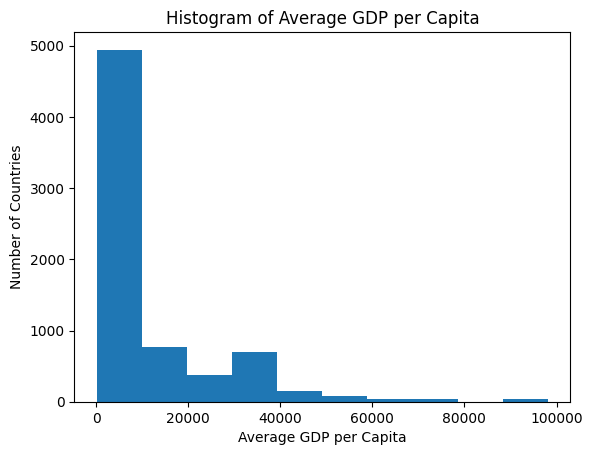

In [82]:
# prompt: plot the histogram for the average GDP per capita

import matplotlib.pyplot as plt

# Create a histogram of the average GDP per capita
plt.hist(gdp_pop_emission1_sorted_desc['avg_gdp_per_capita'], bins=10)
plt.xlabel('Average GDP per Capita')
plt.ylabel('Number of Countries')
plt.title('Histogram of Average GDP per Capita')
plt.show()


In [85]:
# Create a new column in gdp_pop_emission1_sorted_desc for GDP_per_capita_level.
# This will contain 3 possible values: "High", "Medium", and "Low".
# Low will be for rows where avg_gdp_per_capita falls on 33rd percentile.
# Medium for rows that avg_gdp_per_capita fall under 66th percentile.
# High otherwise.

gdp_pop_emission1_sorted_desc.loc[gdp_pop_emission1_sorted_desc['avg_gdp_per_capita'] <= gdp_pop_emission1_sorted_desc['avg_gdp_per_capita'].quantile(0.33), 'GDP_per_capita_level'] = 'Low'
gdp_pop_emission1_sorted_desc.loc[(gdp_pop_emission1_sorted_desc['avg_gdp_per_capita'] > gdp_pop_emission1_sorted_desc['avg_gdp_per_capita'].quantile(0.33)) & (gdp_pop_emission1_sorted_desc['avg_gdp_per_capita'] <= gdp_pop_emission1_sorted_desc['avg_gdp_per_capita'].quantile(0.66)), 'GDP_per_capita_level'] = 'Medium'
gdp_pop_emission1_sorted_desc.loc[gdp_pop_emission1_sorted_desc['avg_gdp_per_capita'] > gdp_pop_emission1_sorted_desc['avg_gdp_per_capita'].quantile(0.66), 'GDP_per_capita_level'] = 'High'
gdp_pop_emission1_sorted_desc.head()



,Country Name,Country Code,Year,GDP,Population,Country,Fuels_Coal,Fuels_Oil,Fuels_Gas,Fuels_Cement,Fuels_Flaring,Fuels_Bunkers,Fuels_Total,GDP_per_capita,pct_change_gdp,pct_change_total_emission,avg_gdp_per_capita,GDP_per_capita_level
7623,Guinea,GIN,2021,1.609182e+10,13531906.0,GIN,0.000000,1.341036,0.000000,0.000000,0.000000,0.022250,1.363286,1189.175999,-0.233695,-0.019809,580.901738,Low
7620,United Kingdom,GBR,2021,3.141506e+12,67026292.0,GBR,6.663073,41.667733,43.628390,1.150424,0.963748,6.299372,100.372740,46869.759058,0.016974,0.072894,31005.522410,High
7619,Gabon,GAB,2021,2.021795e+10,2341179.0,GAB,0.000000,0.577886,0.291789,0.053936,0.686744,0.162827,1.773183,8635.797144,-0.040518,0.013004,5970.217084,Medium
7621,Georgia,GEO,2021,1.862937e+10,3708610.0,GEO,0.222102,0.925750,1.598300,0.279439,0.000638,0.050568,3.076797,5023.274384,-0.248234,-0.005894,2426.018455,Medium
7622,Ghana,GHA,2021,7.952442e+10,32833031.0,GHA,0.000000,3.653997,1.785075,0.010108,0.307469,0.108215,5.864863,2422.085913,0.078063,0.004317,911.775732,Low


In [116]:
# Generate a world map where each country has a color code depending on their GDP_per_capita_level from gdp_pop_emission1_sorted_desc

import plotly.express as px

fig = px.choropleth(gdp_pop_emission1_sorted_desc, locations="Country Code",
                    color="GDP_per_capita_level",
                    hover_name="Country Name",
                    color_discrete_map={
                        "Low": "blue",
                        "Medium": "green",
                        "High": "red",
                    },
                    scope="world",
                    title="World Map by GDP per Capita Level"
                    )
fig.show()


Now let's split the data into the different time frames:

In [98]:
# Split timeframe1 containing all values where Year is between 1983 and 2002,
# and timeframe2 where Year is from 2003 through 2022

timeframe1 = gdp_pop_emission1_sorted_desc[gdp_pop_emission1_sorted_desc['Year'] >= 1983]
timeframe1 = timeframe1[timeframe1['Year'] <= 2002]

timeframe2 = gdp_pop_emission1_sorted_desc[gdp_pop_emission1_sorted_desc['Year'] >= 2003]
timeframe2 = timeframe2[timeframe2['Year'] <= 2022]

In [99]:
len(timeframe1)

3419

In [100]:
len(timeframe2)

3705

In [101]:
# List the unique years in timeframe1 and timeframe2

print("Unique years in timeframe1:", timeframe1['Year'].unique())
print("Unique years in timeframe2:", timeframe2['Year'].unique())


Unique years in timeframe1: [2002 2001 2000 1999 1998 1997 1996 1995 1994 1993 1992 1991 1990 1989
 1988 1987 1986 1985 1984 1983]
Unique years in timeframe2: [2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008
 2007 2006 2005 2004 2003]


### Statistical Analysis and Hypothesis Testing

In this section we will calculate the Pearson correlation between percentage change in GDP and Total Emissions in both time frames.

In case the correaltion is lower in the second timeframe, we will test the hypothesis that this decrease in correlation is statistically significant.

Then we will proceed to calculate the correlation for each group of countries based on the GDP per capita and compare the 2 time frames to find any potential patterns.

We will next test the hypothesis that the countries with higher GDP per capita will have more detachment than countries with lower GDP per capita.



In [110]:
# Run the pearson correlation between the pct_change_gdp and pct_change_emission for decade1

correlation_timeframe1 = timeframe1['pct_change_gdp'].corr(timeframe1['pct_change_total_emission'], method='pearson')
print(f"Correlation between percentage change in GDP and percentage change in CO2 emission from 1983 to 2002: {correlation_timeframe1}")


Correlation between percentage change in GDP and percentage change in CO2 emission from 1983 to 2002: 0.014641337394754846


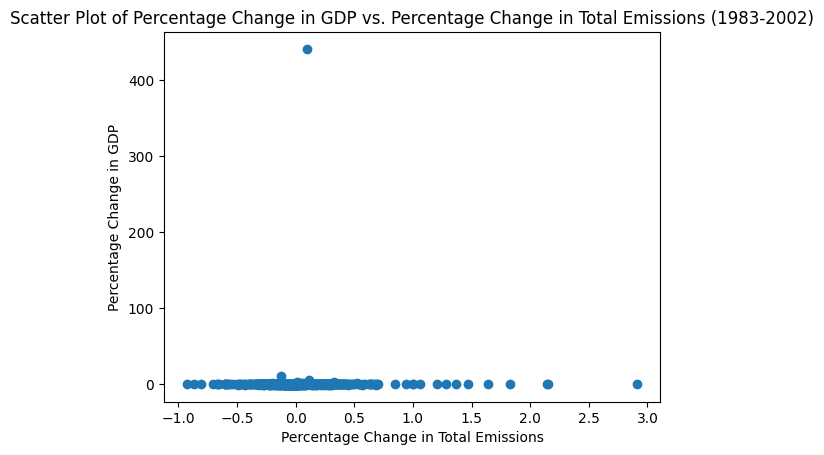

In [103]:
# Make a scatter plot of pct_change_gdp and pct_change_total_emission from timeframe1

import matplotlib.pyplot as plt
plt.scatter(timeframe1['pct_change_total_emission'], timeframe1['pct_change_gdp'])
plt.ylabel('Percentage Change in GDP')
plt.xlabel('Percentage Change in Total Emissions')
plt.title('Scatter Plot of Percentage Change in GDP vs. Percentage Change in Total Emissions (1983-2002)')
plt.show()


In [105]:
# prompt: run the pearson correlation between the pct_change_gdp and pct_change_emission for decade2

correlation_timeframe2 = timeframe2['pct_change_gdp'].corr(timeframe2['pct_change_total_emission'], method='pearson')
print(f"Correlation between percentage change in GDP and percentage change in CO2 emission from 2003 to 2022: {correlation_timeframe2}")


Correlation between percentage change in GDP and percentage change in CO2 emission from 2003 to 2022: 0.20887977782945366


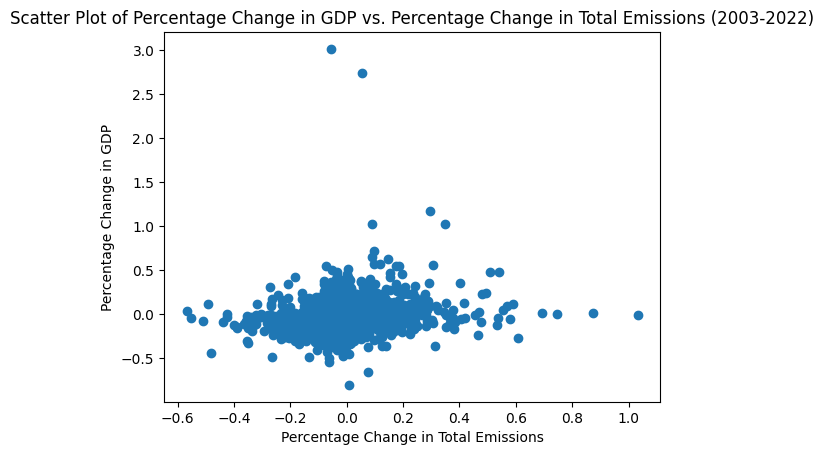

In [106]:
# prompt: Make a scatter plot of pct_change_gdp and pct_change_total_emission from timeframe2

import matplotlib.pyplot as plt
plt.scatter(timeframe2['pct_change_total_emission'], timeframe2['pct_change_gdp'])
plt.ylabel('Percentage Change in GDP')
plt.xlabel('Percentage Change in Total Emissions')
plt.title('Scatter Plot of Percentage Change in GDP vs. Percentage Change in Total Emissions (2003-2022)')
plt.show()


Since the correlation for timeframe 2 is higher than the correlation in timeframe 1, we will explore furhter if this is different for countries in different levels of GDP per capita

In [112]:
# Calculate the Pearson correlation between pct_change_gdp and pct_change_total_emission in timeframe1
# for countries where GDP_per_capita_level is Low

correlation_low_gdp_timeframe1 = timeframe1[timeframe1['GDP_per_capita_level'] == 'Low']['pct_change_gdp'].corr(timeframe1[timeframe1['GDP_per_capita_level'] == 'Low']['pct_change_total_emission'], method='pearson')
print(f"Correlation between % change in GDP and % change in CO2 emission from 1983 to 2002 for low GDP per capita countries: {correlation_low_gdp_timeframe1}")


Correlation between % change in GDP and % change in CO2 emission from 1983 to 2002 for low GDP per capita countries: 0.055125832407256624


In [113]:
# Calculate the Pearson correlation between pct_change_gdp and pct_change_total_emission in timeframe2
# for countries where GDP_per_capita_level is Low

correlation_low_gdp_timeframe2 = timeframe2[timeframe2['GDP_per_capita_level'] == 'Low']['pct_change_gdp'].corr(timeframe2[timeframe2['GDP_per_capita_level'] == 'Low']['pct_change_total_emission'], method='pearson')
print(f"Correlation between % change in GDP and % change in CO2 emission from 2003 to 2022 for low GDP per capita countries: {correlation_low_gdp_timeframe2}")


Correlation between % change in GDP and % change in CO2 emission from 2003 to 2022 for low GDP per capita countries: 0.09784923494800966


For countries with Low GDP per capita, the pattern seems to be the same as for the World as a whole, where the correlation is higher in timeframe 2.

Now let's check for countries with medium level GDP per Capita:

In [117]:
# Calculate the Pearson correlation between pct_change_gdp and pct_change_total_emission in timeframe1 for countries where GDP_per_capita_level is Medium

correlation_medium_gdp_timeframe1 = timeframe1[timeframe1['GDP_per_capita_level'] == 'Medium']['pct_change_gdp'].corr(timeframe1[timeframe1['GDP_per_capita_level'] == 'Medium']['pct_change_total_emission'], method='pearson')
print(f"Correlation between % change in GDP and % change in CO2 emission from 1983 to 2002 for medium GDP per capita countries: {correlation_medium_gdp_timeframe1}")


Correlation between % change in GDP and % change in CO2 emission from 1983 to 2002 for medium GDP per capita countries: 0.025763484099403978


In [118]:
# Calculate the Pearson correlation between pct_change_gdp and pct_change_total_emission in timeframe2 for countries where GDP_per_capita_level is Medium

correlation_medium_gdp_timeframe2 = timeframe2[timeframe2['GDP_per_capita_level'] == 'Medium']['pct_change_gdp'].corr(timeframe2[timeframe2['GDP_per_capita_level'] == 'Medium']['pct_change_total_emission'], method='pearson')
print(f"Correlation between % change in GDP and % change in CO2 emission from 2003 to 2022 for medium GDP per capita countries: {correlation_medium_gdp_timeframe2}")


Correlation between % change in GDP and % change in CO2 emission from 2003 to 2022 for medium GDP per capita countries: 0.2700474227802385


For countries with Medium GDP per capita, the pattern remains the same as for Low GDP per capita, where the correlation is higher in timeframe 2. However, the gap between the 2 correlations decreased as the level of GDP per capita increased.

Now let's check for countries with High level GDP per Capita to confirm if the pattern remains the same.


In [120]:
# Calculate the Pearson correlation between pct_change_gdp and pct_change_total_emission in timeframe1 for countries where GDP_per_capita_level is High

correlation_high_gdp_timeframe1 = timeframe1[timeframe1['GDP_per_capita_level'] == 'High']['pct_change_gdp'].corr(timeframe1[timeframe1['GDP_per_capita_level'] == 'High']['pct_change_total_emission'], method='pearson')
print(f"Correlation between % change in GDP and % change in CO2 emission from 1983 to 2002 for high GDP per capita countries: {correlation_high_gdp_timeframe1}")


Correlation between % change in GDP and % change in CO2 emission from 1983 to 2002 for high GDP per capita countries: 0.1687948610548641


In [121]:
# Calculate the Pearson correlation between pct_change_gdp and pct_change_total_emission in timeframe2 for countries where GDP_per_capita_level is High

correlation_high_gdp_timeframe2 = timeframe2[timeframe2['GDP_per_capita_level'] == 'High']['pct_change_gdp'].corr(timeframe2[timeframe2['GDP_per_capita_level'] == 'High']['pct_change_total_emission'], method='pearson')
print(f"Correlation between % change in GDP and % change in CO2 emission from 2003 to 2022 for high GDP per capita countries: {correlation_high_gdp_timeframe2}")


Correlation between % change in GDP and % change in CO2 emission from 2003 to 2022 for high GDP per capita countries: 0.2720566911277413


The correlation change still follows the same pattern for countries with high GDP per capita.

We can explore other timeframes and isolate more recent years to check if the correlation pattern changes.

Let's split our data into timeframe 3 and 4.

- Timeframe 3 will contain 10 years of data from 2003 to 2012.

- Timeframe 4 will contain 10 years of data from 2013 to 2022.

Assuming that the pace of technological change is exponential and that affects the efficiencies in energy consumption, supply chain, and green energy utilization, we might see differences in the data.


In [130]:
# Create timeframe3 from gdp_pop_emission1_sorted_desc with Year from 2003 to 2012
# Create timeframe4 from gdp_pop_emission1_sorted_desc with Year from 2013 to 2022.

timeframe3 = gdp_pop_emission1_sorted_desc[gdp_pop_emission1_sorted_desc['Year'] >= 2003]
timeframe3 = timeframe3[timeframe3['Year'] <= 2012]

timeframe4 = gdp_pop_emission1_sorted_desc[gdp_pop_emission1_sorted_desc['Year'] >= 2013]
timeframe4 = timeframe4[timeframe4['Year'] <= 2022]


In [131]:
len(timeframe3)

1950

In [132]:
len(timeframe4)

1755

In [128]:
# prompt: Calculate the correlation between pct_change_gdp and pct_change_total_emission on timeframe3

correlation_timeframe3 = timeframe3['pct_change_gdp'].corr(timeframe3['pct_change_total_emission'], method='pearson')
print(f"Correlation between % change in GDP and % change in CO2 emission from 1993 to 2007: {correlation_timeframe3}")


Correlation between % change in GDP and % change in CO2 emission from 1993 to 2007: 0.204076000024524


In [129]:
# prompt: Calculate the correlation between pct_change_gdp and pct_change_total_emission on timeframe4

correlation_timeframe4 = timeframe4['pct_change_gdp'].corr(timeframe4['pct_change_total_emission'], method='pearson')
print(f"Correlation between % change in GDP and % change in CO2 emission from 2008 to 2022: {correlation_timeframe4}")


Correlation between % change in GDP and % change in CO2 emission from 2008 to 2022: 0.18346729051895214


In [135]:
# Do a hypothesis test to check if correlation_timeframe4 is statistically significantly lower than correlation_timeframe3

import numpy as np
import scipy.stats as stats

# Calculate the difference in correlations
correlation_diff = correlation_timeframe3 - correlation_timeframe4

# Calculate the standard error of the difference in correlations
se_diff = np.sqrt(
    (1 - correlation_timeframe3 ** 2) / (len(timeframe3) - 2)
    + (1 - correlation_timeframe4 ** 2) / (len(timeframe4) - 2)
)

# Calculate the z-statistic
z_stat = correlation_diff / se_diff

# Calculate the p-value
p_value = stats.norm.cdf(z_stat)

# Set the significance level
alpha = 0.05

# Compare the p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is significant evidence that the correlation in timeframe4 is lower than the correlation in timeframe3.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to conclude that the correlation in timeframe4 is lower than the correlation in timeframe3.")


Fail to reject the null hypothesis.
There is not enough evidence to conclude that the correlation in timeframe4 is lower than the correlation in timeframe3.


We failed to reject the null hypothesis but we can still check for the same time buckets if the different levels of GDP per capita present a decoupling between GDP and emissions.

In [136]:
# Calculate the Pearson correlation between pct_change_gdp and pct_change_total_emission in timeframe3 for countries where GDP_per_capita_level is Low

correlation_low_gdp_timeframe3 = timeframe3[timeframe3['GDP_per_capita_level'] == 'Low']['pct_change_gdp'].corr(timeframe3[timeframe3['GDP_per_capita_level'] == 'Low']['pct_change_total_emission'], method='pearson')
print(f"Correlation between % change in GDP and % change in CO2 emission from 2003 to 2012 for low GDP per capita countries: {correlation_low_gdp_timeframe3}")


Correlation between % change in GDP and % change in CO2 emission from 2003 to 2012 for low GDP per capita countries: 0.11426547156218576


In [137]:
# Calculate the Pearson correlation between pct_change_gdp and pct_change_total_emission in timeframe4 for countries where GDP_per_capita_level is Low

correlation_low_gdp_timeframe4 = timeframe4[timeframe4['GDP_per_capita_level'] == 'Low']['pct_change_gdp'].corr(timeframe4[timeframe4['GDP_per_capita_level'] == 'Low']['pct_change_total_emission'], method='pearson')
print(f"Correlation between % change in GDP and % change in CO2 emission from 2013 to 2022 for low GDP per capita countries: {correlation_low_gdp_timeframe4}")


Correlation between % change in GDP and % change in CO2 emission from 2013 to 2022 for low GDP per capita countries: 0.08455087792719808


In [138]:
# Calculate the Pearson correlation between pct_change_gdp and pct_change_total_emission in timeframe3 for countries where GDP_per_capita_level is Medium

correlation_medium_gdp_timeframe3 = timeframe3[timeframe3['GDP_per_capita_level'] == 'Medium']['pct_change_gdp'].corr(timeframe3[timeframe3['GDP_per_capita_level'] == 'Medium']['pct_change_total_emission'], method='pearson')
print(f"Correlation between % change in GDP and % change in CO2 emission from 2003 to 2012 for medium GDP per capita countries: {correlation_medium_gdp_timeframe3}")


Correlation between % change in GDP and % change in CO2 emission from 2003 to 2012 for medium GDP per capita countries: 0.24272528622790662


In [139]:
# Calculate the Pearson correlation between pct_change_gdp and pct_change_total_emission in timeframe4 for countries where GDP_per_capita_level is Medium

correlation_medium_gdp_timeframe4 = timeframe4[timeframe4['GDP_per_capita_level'] == 'Medium']['pct_change_gdp'].corr(timeframe4[timeframe4['GDP_per_capita_level'] == 'Medium']['pct_change_total_emission'], method='pearson')
print(f"Correlation between % change in GDP and % change in CO2 emission from 2013 to 2022 for medium GDP per capita countries: {correlation_medium_gdp_timeframe4}")


Correlation between % change in GDP and % change in CO2 emission from 2013 to 2022 for medium GDP per capita countries: 0.2870763363811304


In [140]:
# Calculate the Pearson correlation between pct_change_gdp and pct_change_total_emission in timeframe3 for countries where GDP_per_capita_level is High

correlation_high_gdp_timeframe3 = timeframe3[timeframe3['GDP_per_capita_level'] == 'High']['pct_change_gdp'].corr(timeframe3[timeframe3['GDP_per_capita_level'] == 'High']['pct_change_total_emission'], method='pearson')
print(f"Correlation between % change in GDP and % change in CO2 emission from 2003 to 2012 for high GDP per capita countries: {correlation_high_gdp_timeframe3}")


Correlation between % change in GDP and % change in CO2 emission from 2003 to 2012 for high GDP per capita countries: 0.27797995127745323


In [141]:
# Calculate the Pearson correlation between pct_change_gdp and pct_change_total_emission in timeframe4 for countries where GDP_per_capita_level is High

correlation_high_gdp_timeframe4 = timeframe4[timeframe4['GDP_per_capita_level'] == 'High']['pct_change_gdp'].corr(timeframe4[timeframe4['GDP_per_capita_level'] == 'High']['pct_change_total_emission'], method='pearson')
print(f"Correlation between % change in GDP and % change in CO2 emission from 2013 to 2022 for high GDP per capita countries: {correlation_high_gdp_timeframe4}")


Correlation between % change in GDP and % change in CO2 emission from 2013 to 2022 for high GDP per capita countries: 0.2538636755784626


Correlation differences from timeframe 3 to 4 only indicate that for low and high level GDP per capita countries there was a decrease.

Now we explore if the decrese is statistically significant.



In [142]:
# Do a hypothesis test to check if correlation_low_gdp_timeframe4 is statistically significantly lower than correlation_low_gdp_timeframe3

import numpy as np
# Calculate the difference in correlations
correlation_diff = correlation_low_gdp_timeframe3 - correlation_low_gdp_timeframe4

# Calculate the standard error of the difference in correlations
se_diff = np.sqrt(
    (1 - correlation_low_gdp_timeframe3 ** 2) / (len(timeframe3) - 2)
    + (1 - correlation_low_gdp_timeframe4 ** 2) / (len(timeframe4) - 2)
)

# Calculate the z-statistic
z_stat = correlation_diff / se_diff

# Calculate the p-value
p_value = stats.norm.cdf(z_stat)

# Set the significance level
alpha = 0.05

# Compare the p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is significant evidence that the correlation in timeframe4 is lower than the correlation in timeframe3.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to conclude that the correlation in timeframe4 is lower than the correlation in timeframe3.")


Fail to reject the null hypothesis.
There is not enough evidence to conclude that the correlation in timeframe4 is lower than the correlation in timeframe3.


In [143]:
# Do a hypothesis test to check if correlation_high_gdp_timeframe4 is statistically significantly lower than correlation_high_gdp_timeframe3

import numpy as np
# Calculate the difference in correlations
correlation_diff = correlation_high_gdp_timeframe3 - correlation_high_gdp_timeframe4

# Calculate the standard error of the difference in correlations
se_diff = np.sqrt(
    (1 - correlation_high_gdp_timeframe3 ** 2) / (len(timeframe3) - 2)
    + (1 - correlation_high_gdp_timeframe4 ** 2) / (len(timeframe4) - 2)
)

# Calculate the z-statistic
z_stat = correlation_diff / se_diff

# Calculate the p-value
p_value = stats.norm.cdf(z_stat)

# Set the significance level
alpha = 0.05

# Compare the p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is significant evidence that the correlation in timeframe4 is lower than the correlation in timeframe3.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to conclude that the correlation in timeframe4 is lower than the correlation in timeframe3.")


Fail to reject the null hypothesis.
There is not enough evidence to conclude that the correlation in timeframe4 is lower than the correlation in timeframe3.


Even when factoring in the different levels of GDP per capita, we still fail to prove that there has been a decoupling between GDP growth and CO2 emissions the most recent decade.